In [1]:
# Importing needed libraries:

import pandas as pd
import numpy as np

# visualizing
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=14)

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# importing stats for hypothesis testing:
from scipy import stats

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the os library to access the env (credit)
import os
import env

from env import host, user, password

In [2]:
import acquire
import prep
import wrangle

acquire.py functions loaded successfully
wrangle.py functions loaded successfully


In [3]:
df = prep.prep_zillow_data()
df.shape

(20977, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20977 entries, 0 to 21351
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   20977 non-null  float64
 1   bedroomcnt                    20977 non-null  float64
 2   calculatedbathnbr             20977 non-null  float64
 3   calculatedfinishedsquarefeet  20977 non-null  float64
 4   fips                          20977 non-null  float64
 5   fullbathcnt                   20977 non-null  float64
 6   heatingorsystemtypeid         20977 non-null  float64
 7   latitude                      20977 non-null  float64
 8   longitude                     20977 non-null  float64
 9   lotsizesquarefeet             20977 non-null  float64
 10  propertylandusetypeid         20977 non-null  float64
 11  rawcensustractandblock        20977 non-null  float64
 12  regionidcity                  20977 non-null  float64
 13  r

In [5]:
df.describe()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,propertylandusetypeid
count,20977.000000,20977.000000,20977.000000,20977.000000,20977.000000,20977.000000,20977.000000,2.097700e+04,2.097700e+04,2.097700e+04,...,20977.000000,20977.000000,20977.000000,20977.000000,2.097700e+04,2.097700e+04,20977.0,2.097700e+04,20977.000000,20977.000000
mean,2.255065,3.029461,2.272051,1733.590414,6049.399485,2.203561,3.971021,3.400482e+07,-1.182015e+08,2.721772e+04,...,96592.488688,1.549888,1.106540,1967.995593,1.766183e+05,4.672261e+05,2016.0,2.906078e+05,5718.334901,261.699433
std,0.903462,1.090442,0.882514,771.085739,21.152271,0.871318,2.848036,2.672361e+05,3.611021e+05,8.660500e+04,...,3648.736209,2.872265,0.364304,23.693910,1.586827e+05,4.739390e+05,0.0,3.655081e+05,5460.265168,3.806058
min,0.000000,0.000000,1.000000,242.000000,6037.000000,1.000000,1.000000,3.334085e+07,-1.193883e+08,4.350000e+02,...,95982.000000,0.000000,1.000000,1824.000000,1.290000e+02,1.050400e+04,2016.0,2.250000e+03,19.920000,246.000000
25%,2.000000,2.000000,2.000000,1181.000000,6037.000000,2.000000,2.000000,3.380829e+07,-1.184121e+08,5.971000e+03,...,96193.000000,0.000000,1.000000,1953.000000,8.421000e+04,2.080000e+05,2016.0,8.593500e+04,2712.610000,261.000000
50%,2.000000,3.000000,2.000000,1542.000000,6037.000000,2.000000,3.955741,3.401747e+07,-1.181770e+08,7.541000e+03,...,96395.000000,0.000000,1.000000,1968.261201,1.368320e+05,3.600840e+05,2016.0,2.055310e+05,4459.800000,261.000000
75%,3.000000,4.000000,3.000000,2096.000000,6059.000000,3.000000,3.955741,3.417625e+07,-1.179251e+08,1.973900e+04,...,96987.000000,0.000000,1.108271,1986.000000,2.163420e+05,5.720000e+05,2016.0,3.715490e+05,6954.080000,266.000000
max,10.000000,12.000000,10.000000,4633.000000,6111.000000,10.000000,24.000000,3.477966e+07,-1.175554e+08,3.589145e+06,...,399675.000000,12.000000,4.000000,2015.000000,3.416000e+06,9.323011e+06,2016.0,8.719214e+06,109468.980000,275.000000


#### Overall dataframe histogram

This histogram allows us to see which features in the current dataframe have the highest and lowest correlation. Overall, we will be looking for features that have the strongest positive and negative correlations, so long as they are not features that are derived from each other.

<AxesSubplot:>

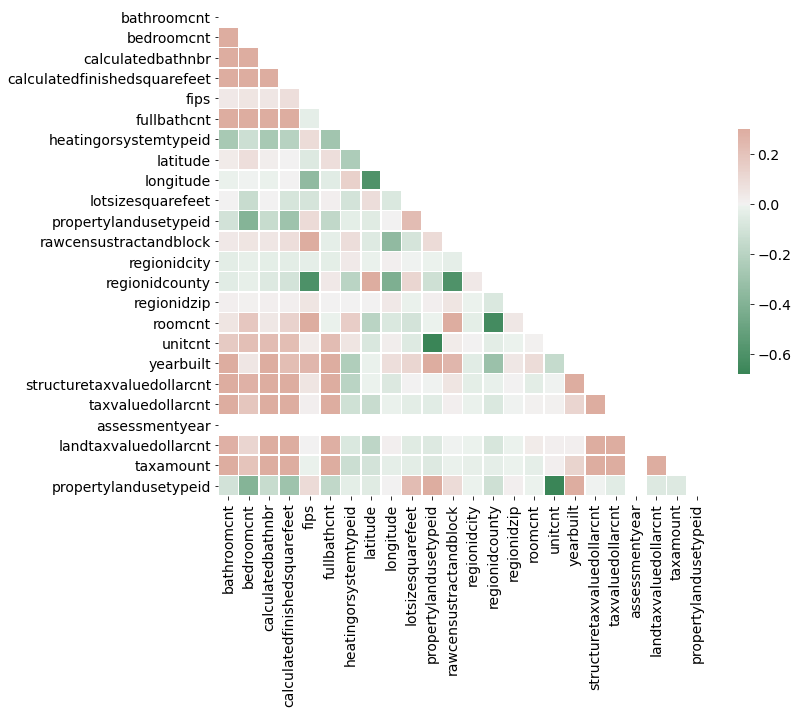

In [6]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Splitting and Scaling

In [7]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(df)

In [8]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.min_max_scale(X_train, X_validate, X_test)

In [9]:
X_train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fullbathcnt
9313,0.25,0.166667,0.166667,0.173552,0.111111
1308,0.20,0.250000,0.111111,0.256174,0.111111
11475,0.20,0.333333,0.111111,0.358643,0.111111
16038,0.30,0.250000,0.222222,0.376875,0.222222
1198,0.10,0.083333,0.000000,0.156935,0.000000


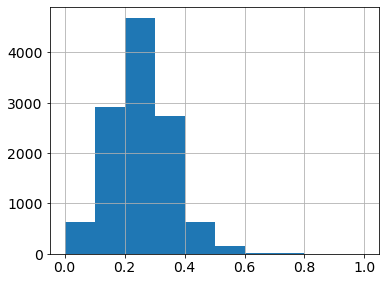

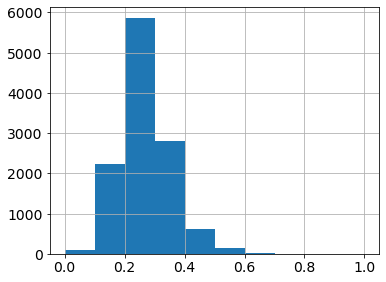

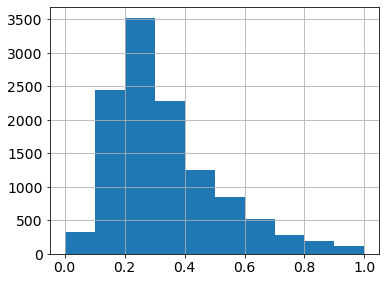

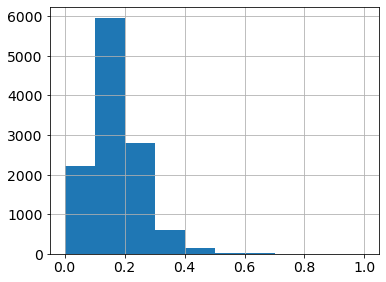

In [10]:
# Now on to explore:



plt.subplot(221)
X_train_scaled.bedroomcnt.hist()
plt.show()
plt.subplot(222)
X_train_scaled.bathroomcnt.hist()
plt.show()
plt.subplot(223)
X_train_scaled.calculatedfinishedsquarefeet.hist()
plt.show()
plt.subplot(224)
X_train_scaled.calculatedbathnbr.hist()
plt.show()

# Want to put these in a subplot group

In [21]:
df_test = acquire.get_zillow_data()

In [88]:
eval_df = df[['calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr','taxvaluedollarcnt']]

In [89]:
eval_df.shape

(20977, 5)

In [90]:
eval_df.describe().round(1)

,calculatedfinishedsquarefeet,bathroomcnt,bedroomcnt,calculatedbathnbr,taxvaluedollarcnt
count,20977.0,20977.0,20977.0,20977.0,20977.0
mean,1733.6,2.3,3.0,2.3,467226.1
std,771.1,0.9,1.1,0.9,473939.0
min,242.0,0.0,0.0,1.0,10504.0
25%,1181.0,2.0,2.0,2.0,208000.0
50%,1542.0,2.0,3.0,2.0,360084.0
75%,2096.0,3.0,4.0,3.0,572000.0
max,4633.0,10.0,12.0,10.0,9323011.0


In [49]:
# eval_df['calculatedfinishedsquarefeet'] = eval_df.calculatedfinishedsquarefeet[(np.abs(stats.zscore(eval_df.calculatedfinishedsquarefeet)) < 3)]

In [57]:
# # Taking out the outliers:

# eval_df['calculatedfinishedsquarefeet'] = eval_df.calculatedfinishedsquarefeet[(np.abs(stats.zscore(eval_df.calculatedfinishedsquarefeet)) < 3)]
# eval_df = eval_df.dropna()

In [70]:
df.describe().round(1)

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,propertylandusetypeid
count,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,...,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0,20977.0
mean,2.3,3.0,2.3,1733.6,6049.4,2.2,4.0,34004824.3,-118201545.3,27217.7,...,96592.5,1.5,1.1,1968.0,176618.3,467226.1,2016.0,290607.8,5718.3,261.7
std,0.9,1.1,0.9,771.1,21.2,0.9,2.8,267236.1,361102.1,86605.0,...,3648.7,2.9,0.4,23.7,158682.7,473939.0,0.0,365508.1,5460.3,3.8
min,0.0,0.0,1.0,242.0,6037.0,1.0,1.0,33340851.0,-119388346.0,435.0,...,95982.0,0.0,1.0,1824.0,129.0,10504.0,2016.0,2250.0,19.9,246.0
25%,2.0,2.0,2.0,1181.0,6037.0,2.0,2.0,33808288.0,-118412113.0,5971.0,...,96193.0,0.0,1.0,1953.0,84210.0,208000.0,2016.0,85935.0,2712.6,261.0
50%,2.0,3.0,2.0,1542.0,6037.0,2.0,4.0,34017471.0,-118177000.0,7541.0,...,96395.0,0.0,1.0,1968.3,136832.0,360084.0,2016.0,205531.0,4459.8,261.0
75%,3.0,4.0,3.0,2096.0,6059.0,3.0,4.0,34176250.0,-117925067.0,19739.0,...,96987.0,0.0,1.1,1986.0,216342.0,572000.0,2016.0,371549.0,6954.1,266.0
max,10.0,12.0,10.0,4633.0,6111.0,10.0,24.0,34779658.0,-117555373.0,3589145.0,...,399675.0,12.0,4.0,2015.0,3416000.0,9323011.0,2016.0,8719214.0,109469.0,275.0


In [103]:
# Converting a continuous into a categorical:

eval_df['tax_range'] = pd.cut(df.taxvaluedollarcnt, bins = [25504, 210000, 360000, 572000, 600000], labels = ["Low", "Medium", "Med-High", "High"])

In [104]:
eval_df.isna().sum()

calculatedfinishedsquarefeet       0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                  0
taxvaluedollarcnt                  0
tax_range                       4869
dtype: int64

In [105]:
eval_df.tax_range.value_counts()

Low         5253
Med-High    5246
Medium      5195
High         414
Name: tax_range, dtype: int64

In [106]:
# eval_df = eval_df.dropna

<AxesSubplot:xlabel='tax_range', ylabel='bedroomcnt'>

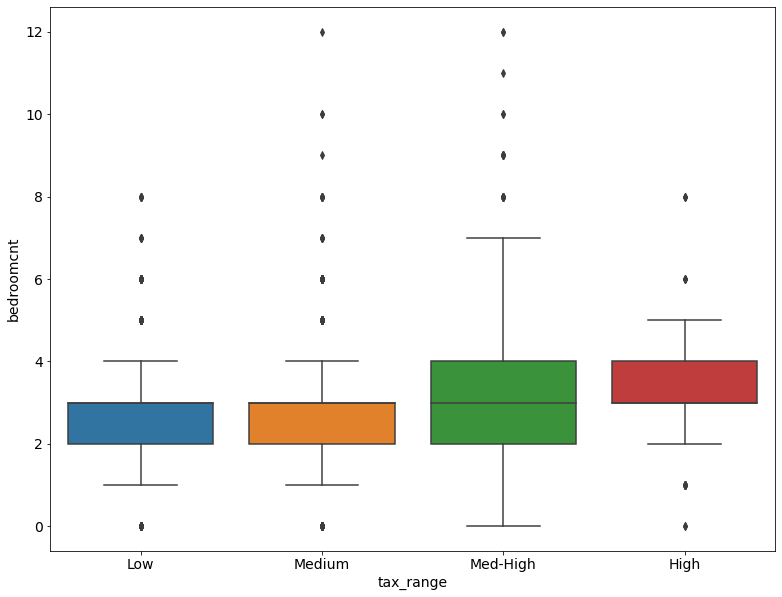

In [107]:
sns.boxplot(data=eval_df, y='bedroomcnt', x='tax_range')

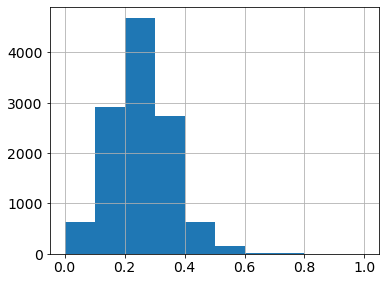

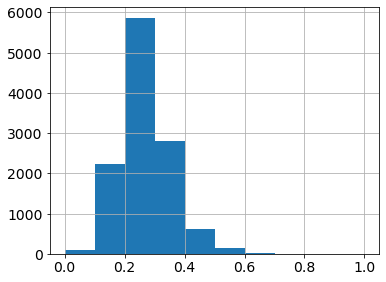

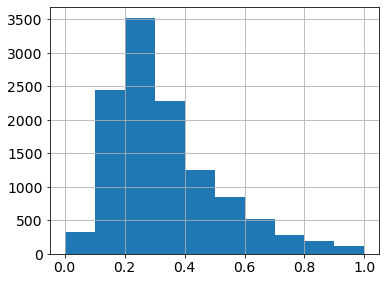

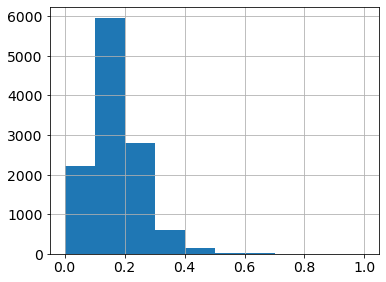

In [11]:
# Now on to explore:

# figure, axes = plt.subplots(nrows = 2, ncols = 2)

# axes[0, 0].plot(x, y)

# axes[0, 1].X_train_scaled.bedroomcnt.hist()


# figure.tight_layout()

plt.subplot(221)
X_train_scaled.bedroomcnt.hist()
plt.show()
plt.subplot(222)
X_train_scaled.bathroomcnt.hist()
plt.show()
plt.subplot(223)
X_train_scaled.calculatedfinishedsquarefeet.hist()
plt.show()
plt.subplot(224)
X_train_scaled.calculatedbathnbr.hist()
plt.show()

# Want to put these in a subplot group

In [ ]:
# Boxplot of bedroom counts compared to tax valuation:

sns.boxplot(x = 'bedroomcnt', y = 'taxvaluedollarcnt', data = df)

In [ ]:
sns.boxplot(x = 'bedroomcnt', y = 'bathroomcnt', data = X_train)

In [ ]:
df.fips.value_counts()

In [ ]:
zillow_heatmap = df[['calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr','taxvaluedollarcnt']]

corr = zillow_heatmap.corr()
corr

In [ ]:
cmap = sns.diverging_palette(15, 175, as_cmap = True)

sns.heatmap(corr, annot = True, cmap = cmap)
plt.show()

In [ ]:
def plot_categorical_and_continuous_vars(df, categorical_var, continuous_var):
    sns.barplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.violinplot(data=df, y=continuous_var, x=categorical_var)
    plt.show()
    sns.boxplot(data=df, y=continuous_var, x=categorical_var)

In [ ]:
plot_categorical_and_continuous_vars(X_train, 'bedroomcnt', 'tax')

# Exploring for Tax Values Report

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20977 entries, 0 to 21351
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   20977 non-null  float64
 1   bedroomcnt                    20977 non-null  float64
 2   calculatedbathnbr             20977 non-null  float64
 3   calculatedfinishedsquarefeet  20977 non-null  float64
 4   fips                          20977 non-null  float64
 5   fullbathcnt                   20977 non-null  float64
 6   heatingorsystemtypeid         20977 non-null  float64
 7   latitude                      20977 non-null  float64
 8   longitude                     20977 non-null  float64
 9   lotsizesquarefeet             20977 non-null  float64
 10  propertylandusetypeid         20977 non-null  float64
 11  rawcensustractandblock        20977 non-null  float64
 12  regionidcity                  20977 non-null  float64
 13  r

In [113]:
tax_df_get = acquire.get_zillow_data()

In [115]:
tax_df_get.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,propertylandusetypeid,logerror,transactiondate
0,2463969,11393337,NaN,NaN,NaN,3.0,3.0,None,4.0,3.0,...,43439.0,2016.0,22755.0,756.94,Y,14.0,6.037235e+13,247,0.086137,2017-06-08
1,2061546,11289917,1.0,NaN,NaN,2.0,3.0,None,6.0,2.0,...,136104.0,2016.0,27214.0,2319.90,Y,15.0,6.037901e+13,261,-0.362001,2017-06-23
2,1834372,11705026,NaN,NaN,NaN,1.0,2.0,None,6.0,1.0,...,35606.0,2016.0,23624.0,543.69,None,NaN,6.037232e+13,261,-0.146056,2017-06-30
3,1923117,14269464,NaN,NaN,NaN,3.0,4.0,None,NaN,3.0,...,880456.0,2016.0,445569.0,9819.72,None,NaN,6.059064e+13,261,0.021085,2017-06-01
4,2121349,11389003,NaN,NaN,NaN,2.0,3.0,None,6.0,2.0,...,614000.0,2016.0,449000.0,7673.19,None,NaN,6.037703e+13,261,-0.325393,2017-06-01


In [114]:
tax_df_get.info()1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21352 non-null  int64  
 1   parcelid                      21352 non-null  int64  
 2   airconditioningtypeid         6569 non-null   float64
 3   architecturalstyletypeid      49 non-null     float64
 4   basementsqft                  12 non-null     float64
 5   bathroomcnt                   21352 non-null  float64
 6   bedroomcnt                    21352 non-null  float64
 7   buildingclasstypeid           0 non-null      object 
 8   buildingqualitytypeid         13363 non-null  float64
 9   calculatedbathnbr             21180 non-null  float64
 10  decktypeid                    179 non-null    float64
 11  finishedfloor1squarefeet      1765 non-null   float64
 12  calculatedfinishedsquarefeet  21297 non-null  float64
 13  f

In [141]:
tax_df = tax_df_get[['id','parcelid', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 
                     'taxamount', 'fips', 'latitude', 'longitude', 'regionidcity', 
                     'regionidcounty', 'regionidneighborhood', 'regionidzip', 'taxdelinquencyflag', 'taxdelinquencyyear']]

In [142]:
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN


In [143]:
# tax_df['tax_rate'] =
tax_df['tax_rate'] = (tax_df.taxamount / tax_df.taxvaluedollarcnt) * 100
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear,tax_rate
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0,1.742536
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0,1.704505
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN,1.526962
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN,1.115299
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN,1.249705


### Fixing the Latitude and Longitude numbers.

In [159]:
# Run this cell to move the decimal point over for the latitude and longitude numbers. Otherwise, those columns are useless.

tax_df['lat_cor'] = tax_df.latitude / 1000000
tax_df['long_cor'] = tax_df.longitude / 1000000
tax_df.head()

,id,parcelid,calculatedfinishedsquarefeet,taxvaluedollarcnt,taxamount,fips,latitude,longitude,regionidcity,regionidcounty,regionidneighborhood,regionidzip,taxdelinquencyflag,taxdelinquencyyear,tax_rate,lat_cor,long_cor
0,2463969,11393337,1534.0,43439.0,756.94,6037.0,33981374.0,-118317057.0,12447.0,3101.0,118208.0,96028.0,Y,14.0,1.742536,33.981374,-118.317057
1,2061546,11289917,1458.0,136104.0,2319.90,6037.0,34686163.0,-118113100.0,5534.0,3101.0,NaN,97318.0,Y,15.0,1.704505,34.686163,-118.113100
2,1834372,11705026,1421.0,35606.0,543.69,6037.0,33999877.0,-118291863.0,12447.0,3101.0,118208.0,96018.0,None,NaN,1.526962,33.999877,-118.291863
3,1923117,14269464,2541.0,880456.0,9819.72,6059.0,33694636.0,-117912245.0,38032.0,1286.0,NaN,96958.0,None,NaN,1.115299,33.694636,-117.912245
4,2121349,11389003,1650.0,614000.0,7673.19,6037.0,33985377.0,-118361620.0,396550.0,3101.0,NaN,96037.0,None,NaN,1.249705,33.985377,-118.361620


<AxesSubplot:xlabel='fips', ylabel='tax_rate'>

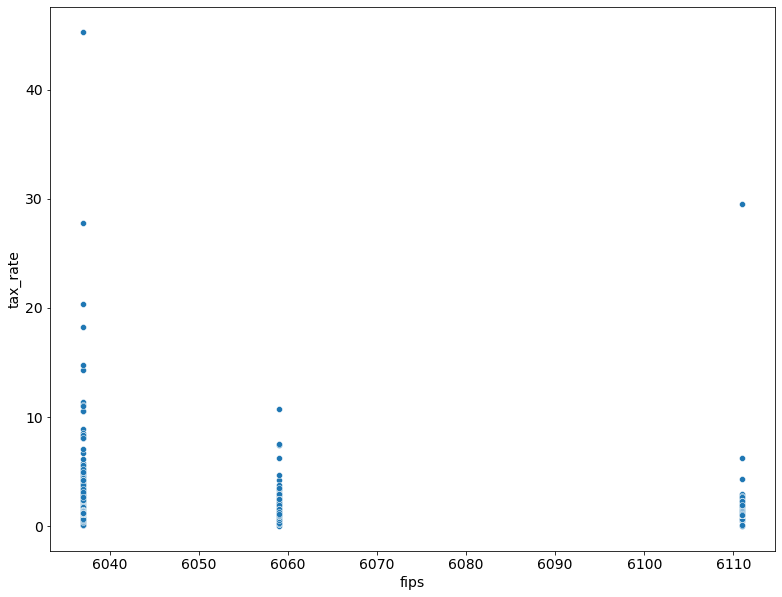

In [160]:
sns.scatterplot(data = tax_df, y = 'tax_rate', x = 'fips')
# plt.xlim(0, 5)

In [161]:
tax_df.tax_rate.mean()

1.3200304791204407

In [162]:
tax_df.tax_rate.median()

1.225454550448422

In [163]:
tax_df.regionidzip.value_counts().count()

383

In [164]:
tax_df.shape

(21352, 17)

In [165]:
# Run this cell to save the dataframe to a .csv

tax_df.to_csv('tax_data_report.csv')